<a href="https://colab.research.google.com/github/DHKing7/dahyunk/blob/main/PyTorch_Pothole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import json

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/캡스톤디자인/1. pothole

/content/drive/MyDrive/캡스톤디자인/1. pothole


In [ ]:
ls

Annotations/  retina_30.pt       test_images/
Images/       test_annotations/  Tutorial-Book-Utils/


In [ ]:
# "Annotations/" 에 있는 파일 불러오기
annots = os.listdir('Annotations')
# "Images/" 에 있는 파일 불러오기
images = os.listdir('Images/Images')

print(len(annots), len(images))

283 283


In [ ]:
# 주석 파일 오픈
with open(f'Annotations/{annots[1]}') as f:
  json_file = json.load(f)

In [ ]:
# 주석 파일은 Dictionary 타입으로, key와 value로 이루어짐
# key 값 확인
json_file.keys()

dict_keys(['info', 'images', 'annotations', 'categories'])

In [ ]:
# 'info' value 확인
json_file['info']

{'contributor': 'Konkuk_university',
 'date_created': '2021/05/12',
 'description': 'V0F_HY_2262_20201228_143014_N_CH1_Busan_Sun_Mainroad_Day_26941_BBOX JSON file',
 'url': '',
 'version': '1.0',
 'year': 2021}

In [ ]:
# 'images' value 확인
json_file['images']

{'file_name': 'V0F_HY_0000_20201228_110133_N_CH1_Busan_Sun_Mainroad_Day_76885.png',
 'height': 720,
 'id': 1,
 'width': 1280}

In [ ]:
# 'annotations' value 확인
json_file['annotations']

[{'area': 6748.600429238726,
  'bbox': [568.9831460674158,
   444.0505617977528,
   86.24719101123583,
   78.247191011236],
  'category_id': 6,
  'id': 1,
  'image_id': 1,
  'is_crowd': 0,
  'polyline': [],
  'segmentation': []},
 {'area': 797.3845695978707,
  'bbox': [696.6129707112971,
   352.9309623430962,
   33.861924686192424,
   23.548117154811735],
  'category_id': 6,
  'id': 2,
  'image_id': 1,
  'is_crowd': 0,
  'polyline': [],
  'segmentation': []},
 {'area': 964.0002744850185,
  'bbox': [660.102510460251,
   319.63903743315507,
   17.990177432707696,
   53.58481193922984],
  'category_id': 2,
  'id': 3,
  'image_id': 1,
  'is_crowd': 0,
  'polyline': [],
  'segmentation': []}]

In [ ]:
# 'categories' value 확인
json_file['categories']

[{'id': 1, 'name': 'Animals(Dolls)'},
 {'id': 2, 'name': 'Person'},
 {'id': 3, 'name': 'Garbage bag & sacks'},
 {'id': 4, 'name': 'Construction signs & Parking prohibited board'},
 {'id': 5, 'name': 'Traffic cone'},
 {'id': 6, 'name': 'Box'},
 {'id': 7, 'name': 'Stones on road'},
 {'id': 8, 'name': 'Pothole on road'},
 {'id': 9, 'name': 'Filled pothole'},
 {'id': 10, 'name': 'Manhole'}]

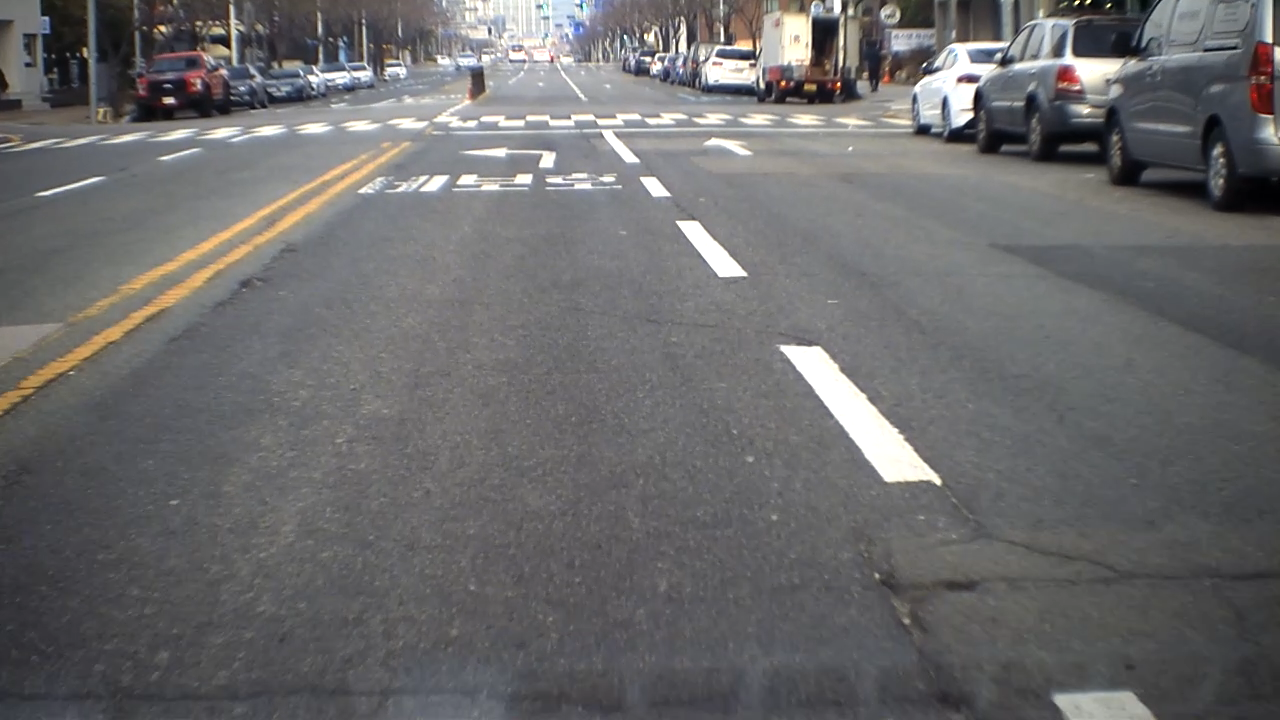

In [ ]:
# 이미지 파일 오픈
annots.sort()
images.sort()

from PIL import Image
Image.open(f'Images/Images/{images[0]}')

In [ ]:
# def generate_box(obj):
    
#     xmin = obj['bbox'][0]
#     ymin = obj['bbox'][1]
#     xmax = obj['bbox'][0]+obj['bbox'][2]
#     ymax = obj['bbox'][1]+obj['bbox'][3]
    
#     return [xmin, ymin, xmax, ymax]

# def generate_label(obj):

#     if obj['category_id'] == 7:
#         return 7

#     elif obj['category_id'] == 8: 
#         return 8

#     elif obj['category_id'] == 9:
#       return 9
#     return 0


# def generate_target(file): 
#     with open(f'Annotations/{file}') as f:
#         data = json.load(f)

#         boxes = []
#         labels = []
#         for i in data['annotations']:
#             boxes.append(generate_box(i))
#             labels.append(generate_label(i))

#         # boxes = torch.as_tensor(boxes, dtype=torch.float32) 
#         # labels = torch.as_tensor(labels, dtype=torch.int64) 
        
#         target = {}
#         target["boxes"] = boxes
#         target["labels"] = labels
        
#         return target

# def plot_image(img_path, annotation):
    
#     img = mpimg.imread('Images/Images/{0}'.format(img_path))
    
#     fig,ax = plt.subplots(1)
#     ax.imshow(img)
    
#     for idx in range(len(annotation["boxes"])):
#         xmin, ymin, xmax, ymax = annotation["boxes"][idx]

#         if annotation['labels'][idx] == 7 :
#             rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
#         elif annotation['labels'][idx] == 8 :
            
#             rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
        
#         elif annotation['labels'][idx] == 9 :
            
#             rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='b',facecolor='none')
            
#         else :
        
#             rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

#         ax.add_patch(rect)

#     plt.show()

In [ ]:
# bbox = generate_target(annots[0])
# plot_image(images[0], bbox)

In [ ]:
# # 이미지에 주석 적용
# from PIL import ImageDraw

# img_open = Image.open(f'Images/Images/{images[0]}').convert('RGB')
# with open(f'Annotations/{annots[0]}') as f:
#   json_file = json.load(f)

# img_draw = ImageDraw.Draw(img_open,'RGBA')

# for i in json_file['annotations']:
#   img_draw.rectangle([i["bbox"][0], i["bbox"][1], i["bbox"][0]+i["bbox"][2], i["bbox"][1]+i["bbox"][3]],outline = (0,255,0,255),fill = (0,255,0,30),width = 2)

# plt.figure(figsize=(20,10))
# plt.imshow(np.array(img_open))
# plt.show()

In [ ]:
# images[0]

'V0F_HY_0000_20201007_155530_E_CH0_Busan_Sun_Mainroad_Day_91178.png'

In [ ]:
def generate_box(obj):
    
    xmin = obj['bbox'][0]
    ymin = obj['bbox'][1]
    xmax = obj['bbox'][0]+obj['bbox'][2]
    ymax = obj['bbox'][1]+obj['bbox'][3]
    
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):

    if obj['category_id'] == 7: 
        return 7

    elif obj['category_id'] == 8: 
        return 8

    elif obj['category_id'] == 9:
      return 9
    return 0


def generate_target(file): 
    with open(f'{file}') as f:
        data = json.load(f)

        boxes = []
        labels = []
        for i in data['annotations']:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        boxes = torch.as_tensor(boxes, dtype=torch.float32) 
        labels = torch.as_tensor(labels, dtype=torch.int64) 
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target

def plot_image_from_output(img, annotation):
    
    img = img.permute(1,2,0)
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    
    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 7 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 8 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
        
        elif annotation['labels'][idx] == 9 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='b',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

In [ ]:
from PIL import Image
import cv2
import numpy as np
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
import albumentations.pytorch
from matplotlib import pyplot as plt
import os
import random

In [ ]:
class TorchvisionMaskDataset(Dataset):
  def __init__(self, path, transform=None):
    self.path = path
    self.imgs = list(sorted(os.listdir(self.path)))
    self.transform = transform

  def __len__(self):
    return len(self.imgs)
  
  def __getitem__(self, idx):
    file_image = self.imgs[idx]
    file_label = self.imgs[idx][:-4] + '_BBOX.json'
    img_path = os.path.join(self.path, file_image)

    if 'test' in self.path:
      label_path = os.path.join("test_annotation/", file_label) # test_annotation 없음
    else:
      label_path = os.path.join("Annotations/", file_label)
    
    img = Image.open(img_path).convert("RGB")

    target = generate_target(label_path)

    start_t = time.time()
    if self.transform:
      img = self.transform(img)
    
    total_time = (time.time() - start_t)

    return img, target, total_time


In [ ]:
torchvision_transform = transforms.Compose([
    transforms.Resize((320,320)),
    transforms.RandomCrop(224),
    transforms.ColorJitter(brightness = 0.2, contrast = 0.2, saturation = 0.2, hue = 0.2),
    transforms.RandomHorizontalFlip(p = 1),
    transforms.ToTensor(),
])

torchvision_dataset = TorchvisionMaskDataset(
    path = 'Images/Images/',
    transform = torchvision_transform
)

Before transforms


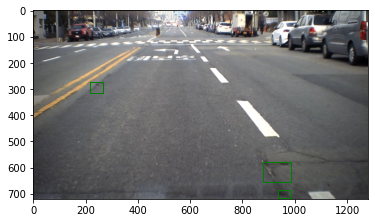

In [ ]:
only_totensor = transforms.Compose([transforms.ToTensor()])

torchvision_dataset_no_transform = TorchvisionMaskDataset(
    path = 'Images/Images/',
    transform = only_totensor
)

img, annot, transform_time = torchvision_dataset_no_transform[0]
print("Before transforms")
plot_image_from_output(img, annot)

In [ ]:
print(np.shape(img))

torch.Size([3, 224, 224])


After transform


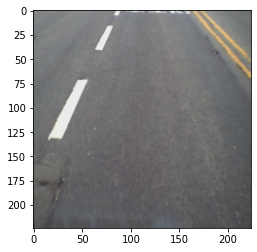

In [ ]:
img, annot, transform_time = torchvision_dataset[0]

print("After transform")
plot_image_from_output(img, annot)

In [ ]:
total_time = 0
for i in range(100):
  sample, _, transform_time = torchvision_dataset[0]
  total_time += transform_time

print("torchvision time: {} ms".format(total_time*10))

torchvision time: 12.856414318084717 ms


In [ ]:
class AlbumentationsDataset(Dataset):
  def __init__(self, path, transform=None):
    self.path = path
    self.imgs = list(sorted(os.listdir(self.path)))
    self.transform = transform

  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, idx):
    file_image = self.imgs[idx]
    file_label = self.imgs[idx][:-4] + '_BBOX.json'
    img_path = os.path.join(self.path, file_image)

    if 'test' in self.path:
      label_path = os.path.join("test_annotaitions/", file_label)
    else:
      label_path = os.path.join("Annotations/", file_label)

    image = cv2.imread(img_path)
    imgae = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    target = generate_target(label_path)

    start_t = time.time()
    if self.transform:
      augmented = self.transform(image = image)
      total_time = (time.time() - start_t)
      image = augmented['image']

    return image, target, total_time

In [ ]:
albumentations_transform = albumentations.Compose([
    albumentations.Resize(320, 320),
    albumentations.RandomCrop(250,250),
    albumentations.ColorJitter(p=1),
    albumentations.HorizontalFlip(p=1),
    albumentations.pytorch.transforms.ToTensor()                                            
])

In [ ]:
# 320 * 320 전처리
# albumentations_transform = albumentations.Compose([
#     albumentations.Resize(320, 320),                                            
# ])
# albumentation_dataset2 = AlbumentaitonsDataset(
#     path = 'Images/Images',
#     transform = albumentations_transform
# )

In [ ]:
print(torch.__version__)

Before Transform


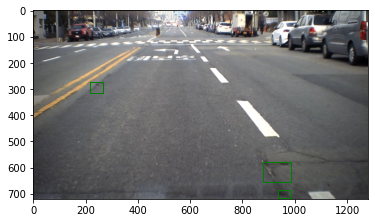

In [ ]:
img, annot, transform_time = torchvision_dataset_no_transform[0]
print('Before Transform')
plot_image_from_output(img, annot)

After Transform


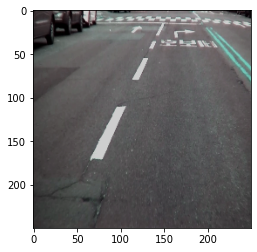

In [ ]:
albumentation_dataset = AlbumentationsDataset(
    path = 'Images/Images/',
    transform = albumentations_transform
)

img, annot, transform_time = albumentation_dataset[0]
print('After Transform')
plot_image_from_output(img, annot)

In [ ]:
total_time = 0
for i in range(100):
  sample, _, transform_time = albumentation_dataset[0]
  total_time += transform_time

print('albumentations time/sample: {} ms'.format(total_time*10))

albumentations time/sample: 2.920372486114502 ms


In [ ]:
albumentations_transform_oneof = albumentations.Compose([
    albumentations.Resize(300,300),
    albumentations.RandomCrop(224,224),
    albumentations.OneOf([
                          albumentations.HorizontalFlip(p=1),
                          albumentations.RandomRotate90(p=1),
                          albumentations.VerticalFlip(p=1)  
    ], p=1),
    albumentations.OneOf([
                          albumentations.MotionBlur(p=1),
                          albumentations.OpticalDistortion(p=1),
                          albumentations.GaussNoise(p=1)
    ], p=1),
    albumentations.pytorch.ToTensor()
])

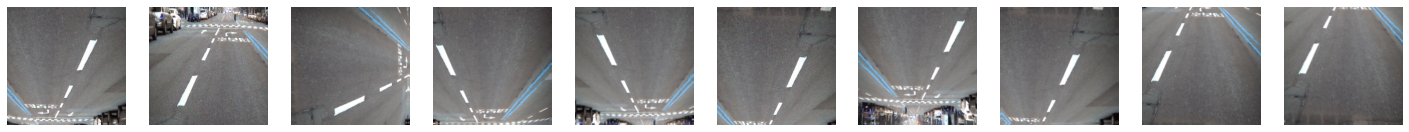

In [ ]:
albumentation_dataset_oneof = AlbumentationsDataset(
    path = 'Images/Images/',
    transform = albumentations_transform_oneof
)

num_samples = 10
fig, ax = plt.subplots(1, num_samples, figsize=(25,5))

for i in range(num_samples):
  ax[i].imshow(transforms.ToPILImage()(albumentation_dataset_oneof[0][0]))
  ax[i].axis('off')

In [ ]:
class BboxAugmentationDataset(Dataset):
  def __init__(self, path, transform = None):
    self.path = path
    self.imgs = list(sorted(os.listdir(self.path)))
    self.transform = transform

  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, idx):
    file_image = self.imgs[idx]
    file_label = self.imgs[idx][:-4] + "_BBOX.json"
    img_path = os.path.join(self.path, file_image)

    if 'test' in self.path:
      label_path = os.path.join('test_annotations/', file_label)
    else:
      label_path = os.path.join('Annotations/', file_label)
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    target = generate_target(label_path)

    if self.transform:
      transformed = self.transform(image = image, bboxes = target['boxes'], labels = target['labels'])
      image = transformed['image']
      target = {'boxes':transformed['bboxes'], 'labels':transformed['labels']}

    return image, target

In [ ]:
bbox_transform = albumentations.Compose(
    [albumentations.HorizontalFlip(p=1),
     albumentations.Rotate(p=1),
     albumentations.pytorch.transforms.ToTensor()],
     bbox_params = albumentations.BboxParams(format = 'pascal_voc', label_fields=['labels']),
)

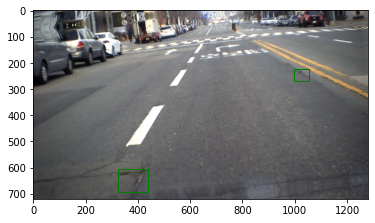

In [ ]:
bbox_transform_dataset = BboxAugmentationDataset(
    path = 'Images/Images/',
    transform = bbox_transform
)

img, annot = bbox_transform_dataset[0]
plot_image_from_output(img, annot)

In [ ]:
print(len(annots))
print(len(images))

354
354


In [ ]:
from tqdm import tqdm
from collections import Counter
import pandas as pd

In [ ]:
!mkdir test_images
!mkdir test_annotations

In [ ]:
import random
random.seed(1234)
idx = random.sample(range(354), 71)
print(len(idx))
print(idx[:10])

71
[225, 59, 3, 46, 298, 17, 343, 42, 50, 181]


In [ ]:
import numpy as np
import shutil

for img in np.array(sorted(images))[idx]:
  shutil.move('Images/Images/'+img, 'test_images/'+img)

for annot in np.array(sorted(annots))[idx]:
  shutil.move('Annotations/'+annot, 'test_annotations/'+annot)

In [ ]:
def get_num_objects_for_each_class(dataset):

  total_labels = []

  for img, annot in tqdm(dataset, position = 0, leave = True):
    total_labels += [int(i) for i in annot['labels']]

  return Counter(total_labels)

train_data = BboxAugmentationDataset(
    path = 'Images/Images/'
)

test_data = BboxAugmentationDataset(
    path = 'test_images/'
)

train_objects = get_num_objects_for_each_class(train_data)
test_objects = get_num_objects_for_each_class(test_data)

print('\n train 데이터에 있는 객체', train_objects)
print('\n test 데이터에 있는 객체', test_objects)

100%|██████████| 71/71 [00:53<00:00,  1.34it/s]


 train 데이터에 있는 객체 Counter({8: 493, 0: 292})

 test 데이터에 있는 객체 Counter({8: 118, 0: 61})


In [ ]:
# pip uninstall albumentations
# pip uninstall opencv-python-headless==4.5.5.62
# pip install opencv-python-headless==4.5.2.52
# !pip install albumentations==0.5.2.

In [ ]:
pip uninstall albumentations

Found existing installation: albumentations 0.1.12
Uninstalling albumentations-0.1.12:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/albumentations-0.1.12.dist-info/*
    /usr/local/lib/python3.7/dist-packages/albumentations/*
Proceed (y/n)? y
  Successfully uninstalled albumentations-0.1.12


In [ ]:
pip uninstall opencv-python-headless==4.5.5.62

In [ ]:
pip install opencv-python-headless==4.5.2.52

     |████████████████████████████████| 38.2 MB 1.2 MB/s 


In [ ]:
!pip install albumentations==0.5.2.

     |████████████████████████████████| 72 kB 610 kB/s 
     |████████████████████████████████| 948 kB 10.8 MB/s 
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
print()